In [353]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# covid data files
covid_data_path = "../Data/covid-data.csv"
travel_data_path = "../Data/international-travel-covid.csv"

# read data
covid_data = pd.read_csv(covid_data_path)
travel_data = pd.read_csv(travel_data_path)

In [354]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [355]:
travel_data.head()

,Entity,Code,Day,international_travel_controls
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0


In [356]:
# remove rows for continents to avoid duplicate value with countries
continent = ['North America','South America','Africa','Asia','Europe', 'International']
covid_data[~covid_data.location.isin(continent)]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96203,ZWE,Africa,Zimbabwe,2021-06-12,39852.0,164.0,97.714,1632.0,3.0,3.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
96204,ZWE,Africa,Zimbabwe,2021-06-13,39959.0,107.0,110.000,1632.0,0.0,3.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
96205,ZWE,Africa,Zimbabwe,2021-06-14,40077.0,118.0,119.857,1635.0,3.0,3.429,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
96206,ZWE,Africa,Zimbabwe,2021-06-15,40318.0,241.0,142.429,1637.0,2.0,2.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [357]:
# add extract month & year so we can group by month
covid_data["month_year"] = covid_data["date"].astype(str).str[:7]

In [358]:
# select required columns
covid_data_cleaned = covid_data[['month_year','continent', 'location', 'date', 'total_cases', 'new_cases','total_deaths' ,'new_deaths']]
covid_data_cleaned

,month_year,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-02,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN
1,2020-02,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN
2,2020-02,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN
3,2020-02,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN
4,2020-02,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
96203,2021-06,Africa,Zimbabwe,2021-06-12,39852.0,164.0,1632.0,3.0
96204,2021-06,Africa,Zimbabwe,2021-06-13,39959.0,107.0,1632.0,0.0
96205,2021-06,Africa,Zimbabwe,2021-06-14,40077.0,118.0,1635.0,3.0
96206,2021-06,Africa,Zimbabwe,2021-06-15,40318.0,241.0,1637.0,2.0


In [359]:
# merge selected_covid_data and international_travel_data
merged_covid_df = pd.merge(covid_data_cleaned, travel_data, how='left', left_on=['date','location'], right_on = ['Day','Entity'])

In [360]:
merged_covid_df.head()

,month_year,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,Entity,Code,Day,international_travel_controls
0,2020-02,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,Afghanistan,AFG,2020-02-24,3.0
1,2020-02,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,Afghanistan,AFG,2020-02-25,3.0
2,2020-02,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,Afghanistan,AFG,2020-02-26,3.0
3,2020-02,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,Afghanistan,AFG,2020-02-27,3.0
4,2020-02,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,Afghanistan,AFG,2020-02-28,3.0


In [361]:
merged_covid_df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [371]:
#au_df = merged_covid_df.loc[merged_covid_df['location'] == 'Australia']
#us_df = merged_covid_df.loc[merged_covid_df['location'] == 'United States']
#in_df = merged_covid_df.loc[merged_covid_df['location'] == 'India']
#cn_df = merged_covid_df.loc[merged_covid_df['location'] == 'China']
#uk_df = merged_covid_df.loc[merged_covid_df['location'] == 'United Kingdom']
#bz_df = merged_covid_df.loc[merged_covid_df['location'] == 'Brazil']
#kr_df = merged_covid_df.loc[merged_covid_df['location'] == 'South Korea']

#au_new_case = au_df.groupby(['month_year'])['new_cases'].sum()
#us_new_case = us_df.groupby(['month_year'])['new_cases'].sum()
#in_new_case = in_df.groupby(['month_year'])['new_cases'].sum()
#cn_new_case = cn_df.groupby(['month_year'])['new_cases'].sum()
#uk_new_case = uk_df.groupby(['month_year'])['new_cases'].sum()
#bz_new_case = bz_df.groupby(['month_year'])['new_cases'].sum()
#kr_new_case = kr_df.groupby(['month_year'])['new_cases'].sum()

countries = ['Australia', 'United States', 'India', 'China', 'United Kingdom', 'Brazil', 'South Korea']
country_df = merged_covid_df[merged_covid_df['location'].isin(countries)]

#monthly_au_new_case = au_df.groupby(['month_year'])['new_cases'].sum()
monthly_new_case = country_df.groupby(["month_year"])['new_cases'].sum()
avg_travel_control_selcted = country_df.groupby(["month_year"])['international_travel_controls'].mean()
country_df

,month_year,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,Entity,Code,Day,international_travel_controls
5038,2020-01,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,Australia,AUS,2020-01-26,0.0
5039,2020-01,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,Australia,AUS,2020-01-27,0.0
5040,2020-01,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,Australia,AUS,2020-01-28,0.0
5041,2020-01,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,Australia,AUS,2020-01-29,0.0
5042,2020-01,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,Australia,AUS,2020-01-30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
91685,2021-06,North America,United States,2021-06-12,33457228.0,8228.0,599665.0,280.0,United States,USA,2021-06-12,3.0
91686,2021-06,North America,United States,2021-06-13,33462003.0,4775.0,599776.0,111.0,United States,USA,2021-06-13,3.0
91687,2021-06,North America,United States,2021-06-14,33474734.0,12731.0,599946.0,170.0,NaN,NaN,NaN,NaN
91688,2021-06,North America,United States,2021-06-15,33486038.0,11304.0,600285.0,339.0,NaN,NaN,NaN,NaN


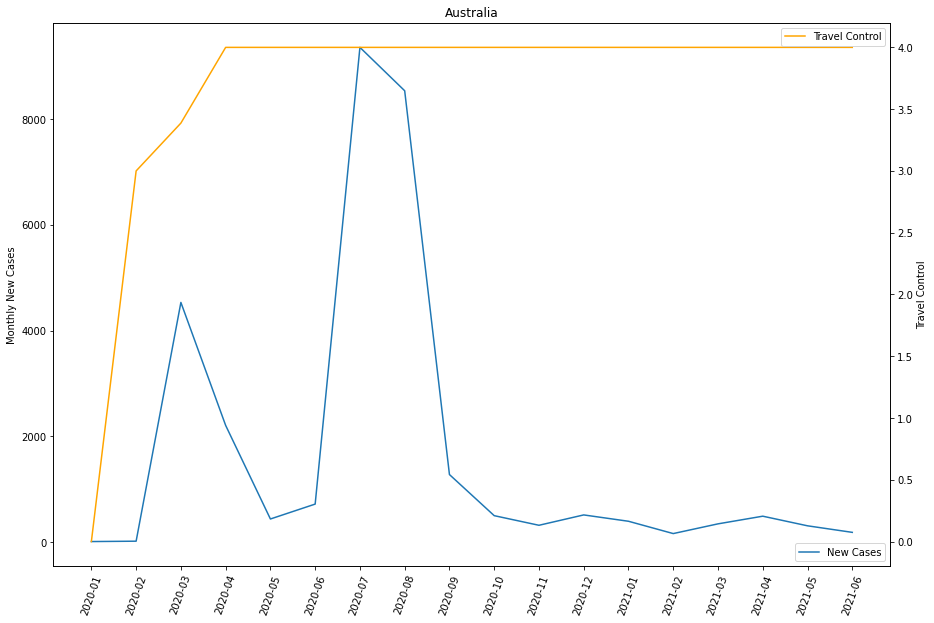

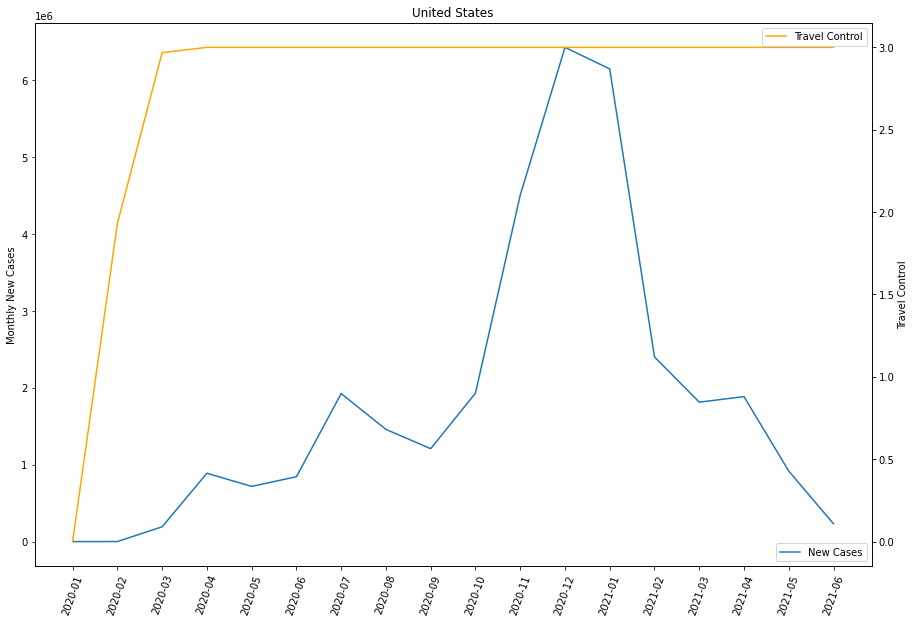

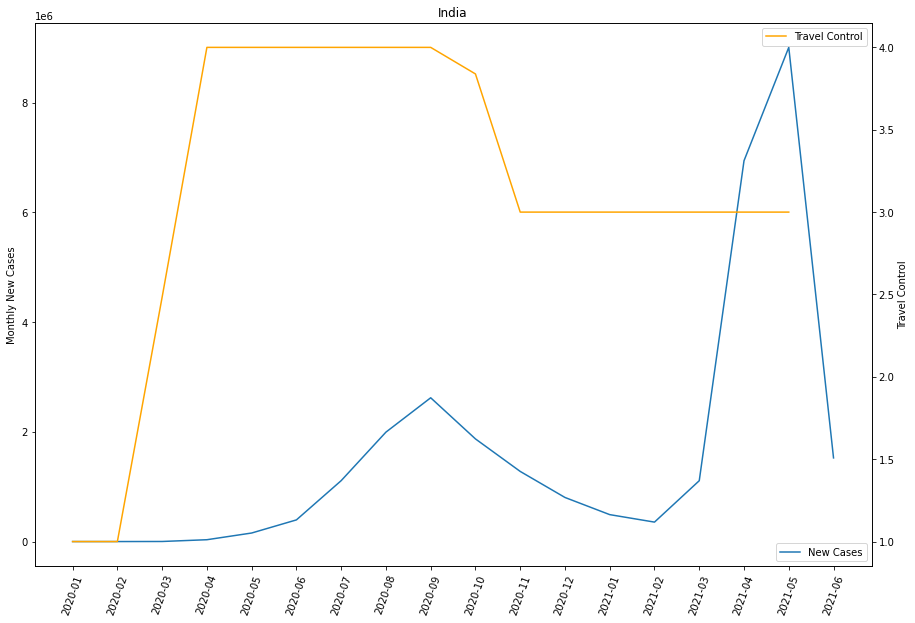

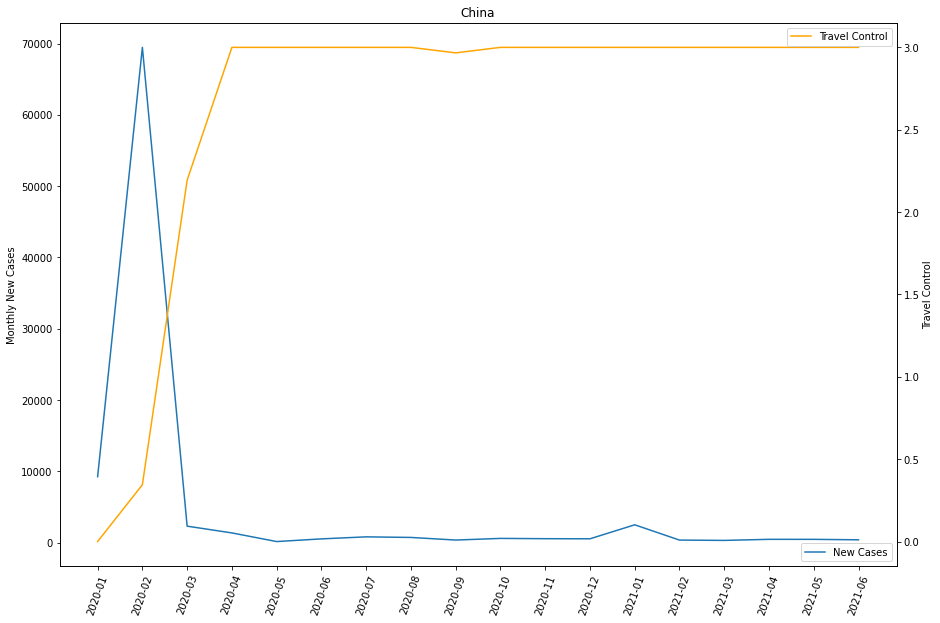

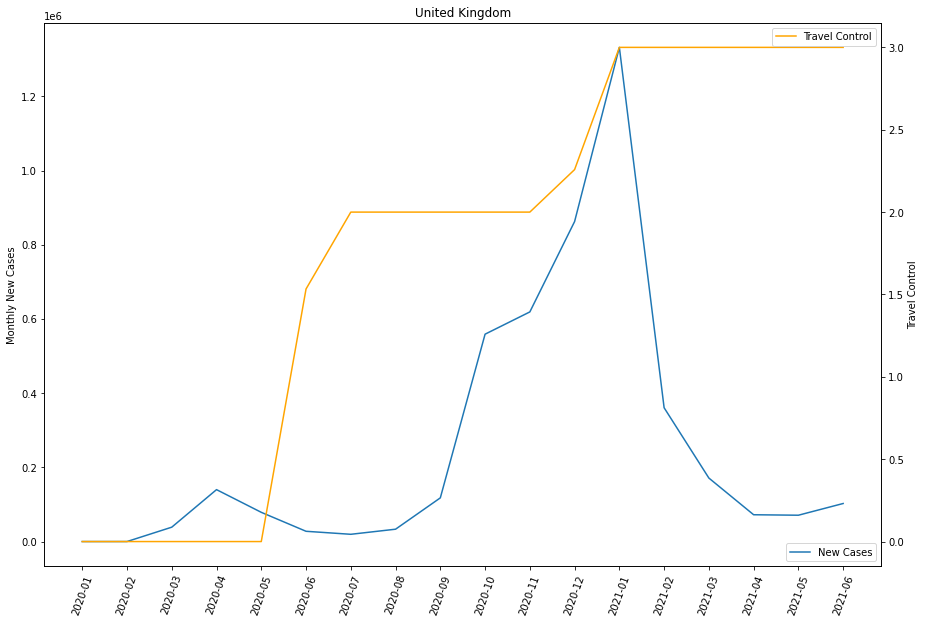

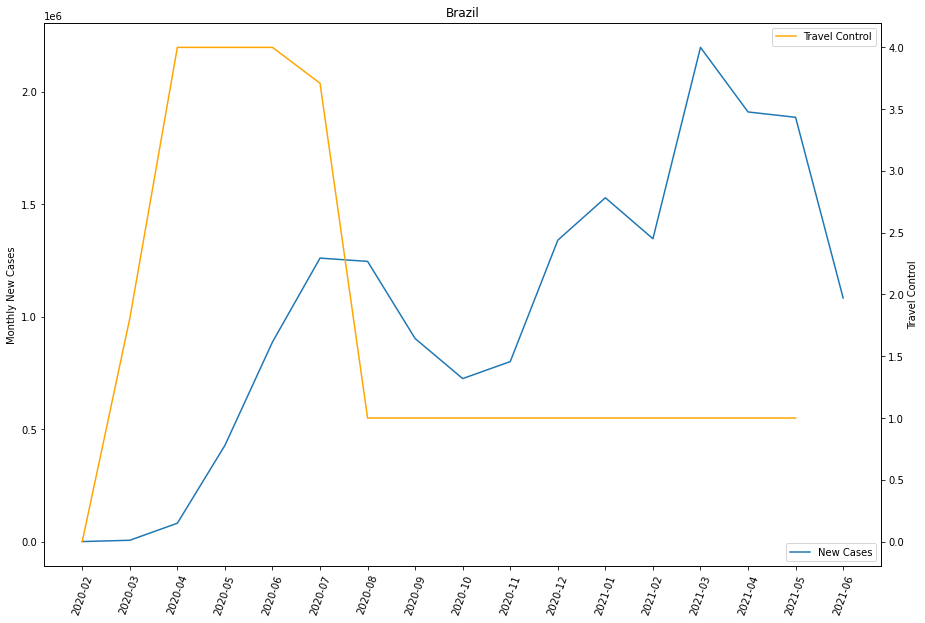

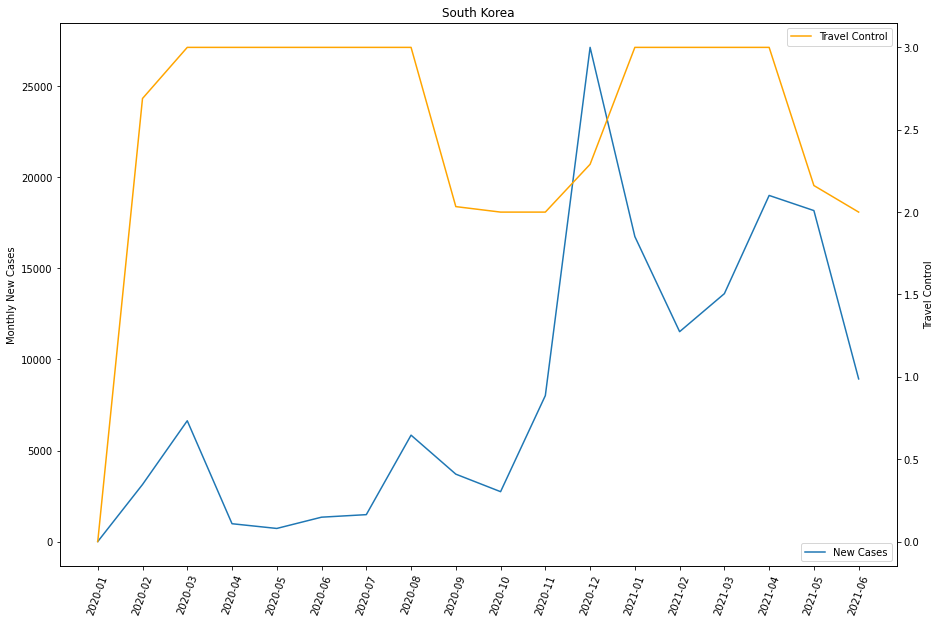

In [363]:
# Plot monthly new cases for each selected countries
for country in countries:
    monthly_new_cases = country_df[(country_df["location"] == country)].groupby(['month_year'])['new_cases'].sum()
    travel_policies = country_df[(country_df["location"] == country)].groupby(['month_year'])['international_travel_controls'].mean()

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 10)
    ax.set_ylabel("Monthly New Cases")
    ax.plot(monthly_new_cases)
    
    plt.xticks(rotation=70)
    ax2=ax.twinx()
    
    #ax.plot(travel_policies, label = "International Travel Control")
   
    plt.title(country)
    plt.xlabel("Month Year")
    plt.ylabel("New Cases")
    
    ax2.plot(travel_policies, color="orange")
    ax2.set_ylabel("Travel Control")
    legend = ax.legend(["New Cases"], loc='lower right')
    legend2 = ax2.legend(["Travel Control"], loc='upper right')
    
    filpath = f"output/{country}_new_case_travel_control.png"
    fig.savefig(filpath)
    
    plt.show()

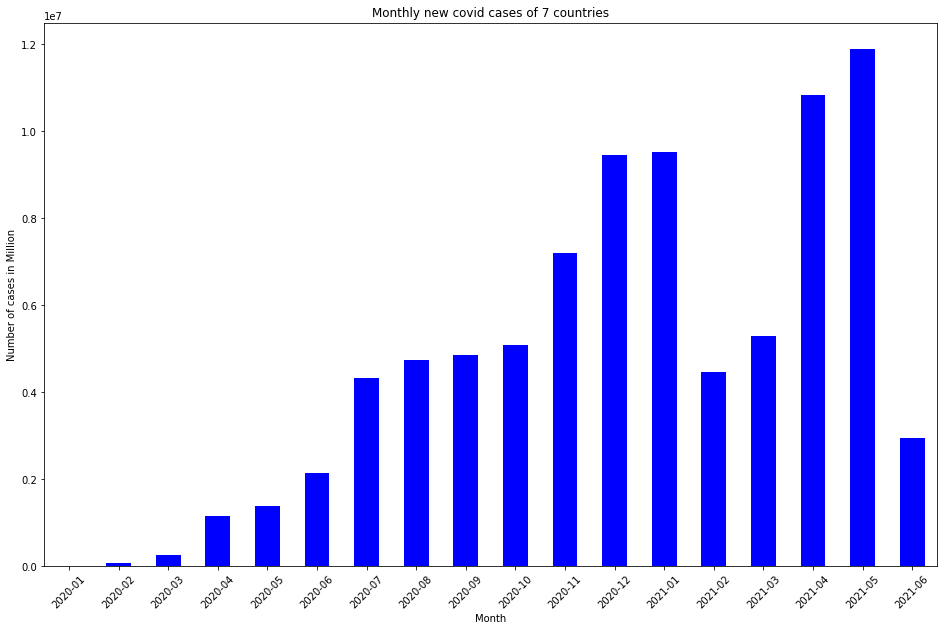

In [364]:
monthly_new_case.plot(kind="bar", color="b", figsize=(16, 10))
plt.title("Monthly new covid cases of 7 countries")
plt.ylabel("Number of cases in Million")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.savefig("output/new_cases_7_countries_barplot.png")
plt.show()

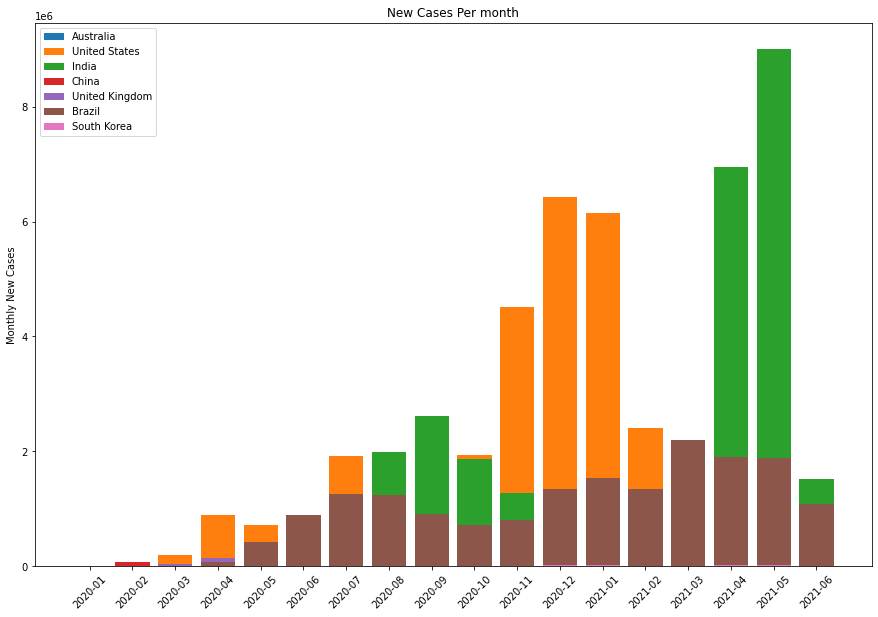

In [367]:
fig,ax = plt.subplots(figsize=(15,10))

for country in countries:
    monthly_new_cases = country_df[(country_df["location"] == country)].groupby(['month_year'])['new_cases'].sum()
    ax.bar(country_df[(country_df["location"] == country)]['month_year'].unique(), monthly_new_cases, label = country)
    
ax.set_ylabel('Monthly New Cases')
ax.set_title('New Cases Per month')
ax.legend()
plt.xticks(rotation=45)
plt.savefig("output/new_cases_7_each_country_barplot.png")
plt.show()


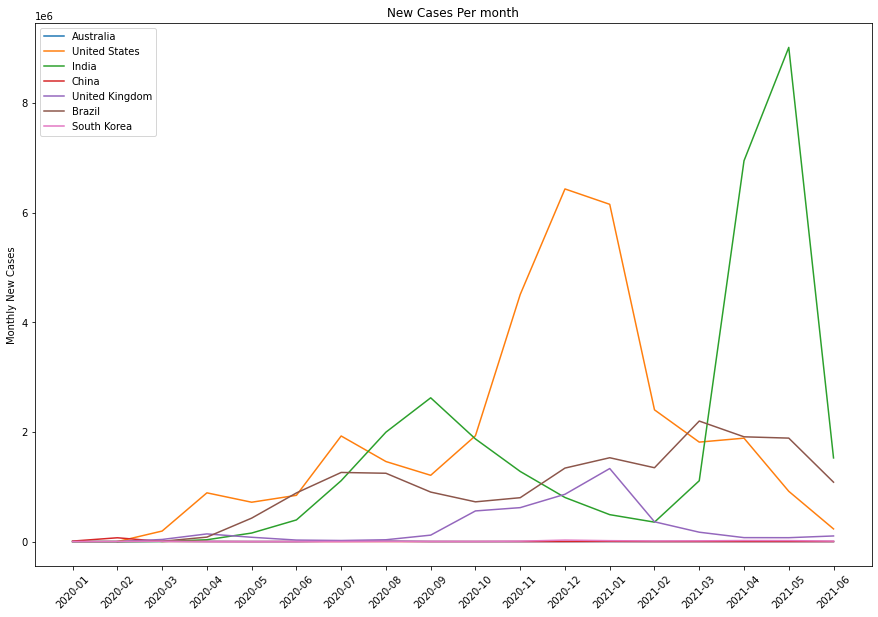

In [368]:
fig,ax = plt.subplots(figsize=(15,10))

for country in countries:
    monthly_new_cases = country_df[(country_df["location"] == country)].groupby(['month_year'])['new_cases'].sum()
    travel_policies = country_df[(country_df["location"] == country)].groupby(['month_year'])['international_travel_controls'].mean()

    ax.set_ylabel("Monthly New Cases")
    ax.plot(monthly_new_cases, label = country)
    
ax.set_ylabel('Monthly New Cases')
ax.set_title('New Cases Per month')
ax.legend()
plt.xticks(rotation=45)
plt.savefig("output/new_cases_7_each_country_line_plot.png")
plt.show()

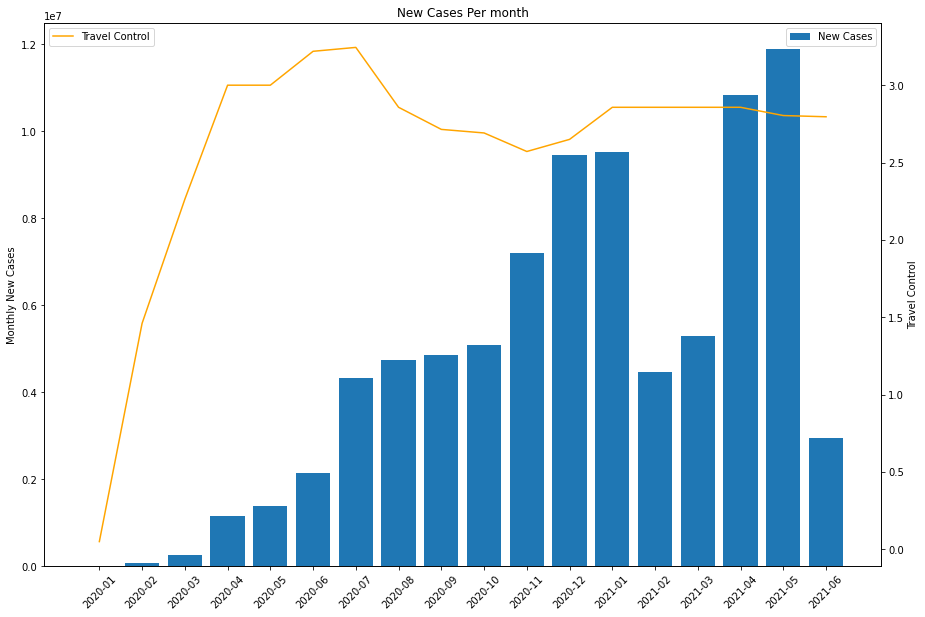

In [370]:
fig,ax = plt.subplots(figsize=(15,10))

ax.bar(country_df[(country_df["location"] == country)]['month_year'].unique(), monthly_new_case, label = "Total New Cases")

    
ax.set_ylabel('Monthly New Cases')
ax.set_title('New Cases Per month')
plt.xticks(rotation=45)

ax2=ax.twinx()
ax2.plot(avg_travel_control_selcted, color="orange")
ax2.set_ylabel("Travel Control")
legend = ax.legend(["New Cases"], loc='upper right')
legend2 = ax2.legend(["Travel Control"], loc='upper left')


plt.savefig("output/new_cases_and_travel_control.png")
plt.show()



In [351]:
def run_linear_regress(x_values, y_values, title, xlable, ylabel, x_ann, y_ann):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-value is: {rvalue}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, marker = 'o', facecolors="blue")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_ann, y_ann),fontsize=15, color="red")
    plt.xlabel(xlable)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

533
533
The r-value is: nan


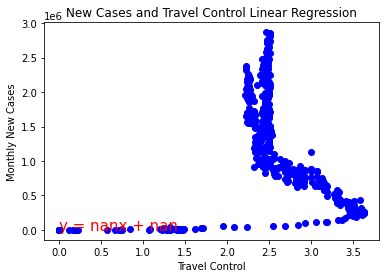

<Figure size 432x288 with 0 Axes>

In [352]:
ylabel = "Monthly New Cases"
xlable = "Travel Control"
title = "New Cases and Travel Control Linear Regression"

sum_new_cases = merged_covid_df.groupby(["date"])['new_cases'].sum()
avg_travel_control = merged_covid_df.groupby(["date"])['international_travel_controls'].mean()
print(len(sum_new_case))
print(len(avg_travel_control))

run_linear_regress(avg_travel_control, sum_new_cases, title, xlable, ylabel, 0, 15)

plt.savefig("output/new_case_travel_control_linear_regression.png")